# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
# your code here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random 

In [2]:
#random data
"""
The random library will be used to generate random tweet data to analyze.
"""
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

data = {'Date': pd.date_range('2021-01-01',periods=500), 
        'Category': [random.choice(categories) for _ in range(500)],
        'Likes': np.random.randint(0, 10000, size=500)}

In [3]:
#Load the data into a df
df = pd.DataFrame(data)
df.head()

,Date,Category,Likes
0,2021-01-01,Health,3584
1,2021-01-02,Culture,9646
2,2021-01-03,Music,2084
3,2021-01-04,Fitness,5160
4,2021-01-05,Fitness,7561


In [4]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [5]:
#df description
df.describe()

,Likes
count,500.000000
mean,5034.904000
std,2836.067752
min,38.000000
25%,2757.750000
50%,4885.000000
75%,7480.250000
max,9991.000000


In [6]:
#Count of each category
df['Category'].value_counts()

Music      77
Health     67
Family     67
Travel     59
Culture    58
Food       58
Fashion    58
Fitness    56
Name: Category, dtype: int64

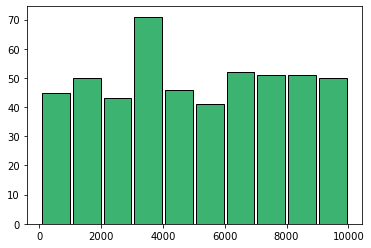

In [24]:
plt.hist(df['Likes'],
         edgecolor='black',
         rwidth=0.9,
         color='mediumseagreen'
         )
plt.show()

In [7]:
#Null or NaN values
df.isna().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [8]:
#duplicates
df.duplicated().sum()

0

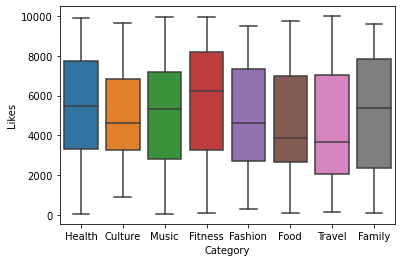

In [36]:
#boxplot
sns.boxplot(data=df,
           x='Category',
           y='Likes')
plt.show()

In [20]:
# mean metric of 'likes' category
df['Likes'].mean()

5034.904

In [39]:
# mean metrics by caategories
df.groupby(['Category']).mean()[['Likes']].reset_index()

,Category,Likes
0,Culture,4919.551724
1,Family,5115.656716
2,Fashion,4895.534483
3,Fitness,5770.660714
4,Food,4632.810345
5,Health,5354.820896
6,Music,5094.857143
7,Travel,4449.000000


Text(0.5, 1.0, 'mean distribution of likes by categories')

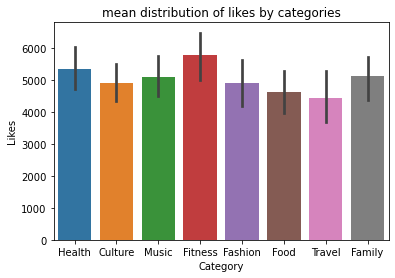

In [22]:
sns.barplot(data=df,
           x='Category',
           y='Likes')
plt.title('mean distribution of likes by categories')

Time Series Analisis

In [25]:
#Add month and year column and reshape df
import datetime
df['Month'] = df['Date'].dt.month_name().str.slice(stop=3)
df['Year'] = df['Date'].dt.year
col_order = ['Date', 'Year', 'Month', 'Category', 'Likes']
df = df[col_order]
df.head()

,Date,Year,Month,Category,Likes
0,2021-01-01,2021,Jan,Health,3584
1,2021-01-02,2021,Jan,Culture,9646
2,2021-01-03,2021,Jan,Music,2084
3,2021-01-04,2021,Jan,Fitness,5160
4,2021-01-05,2021,Jan,Fitness,7561


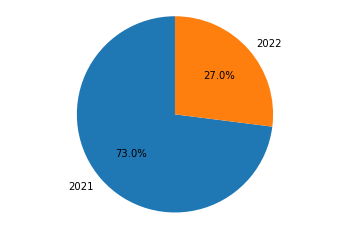

In [26]:
#tweets count by year
df_year = df['Year'].value_counts()
label=['2021','2022']
plt.pie(df_year,labels=label,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Dsitribution of likes by month in 2021')

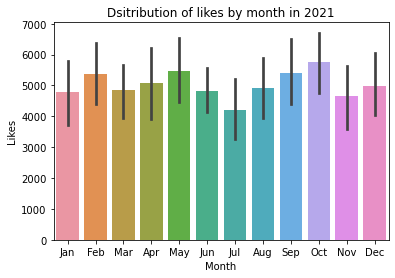

In [27]:
#tweets count by month
months = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
sns.barplot(data=df[df['Year']==2021],
           x='Month',
           y='Likes')
plt.title('Dsitribution of likes by month in 2021')

Text(0.5, 1.0, 'Dsitribution of likes by month in 2022')

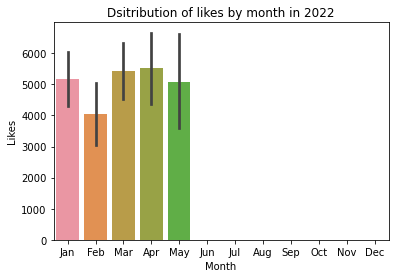

In [28]:
sns.barplot(data=df[df['Year']==2022],
           x='Month',
           y='Likes')
plt.title('Dsitribution of likes by month in 2022')

In [32]:
#Find missing dates by comparing all dates in 2021
# to dates in the df
date_range= pd.date_range(start='2021-01-01', end='2021-12-31')
date_range.difference(df[df['Year']==2021]['Date'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [33]:
#Find missing dates by comparing all dates in 2022
# to dates in the df
date_range= pd.date_range(start='2022-01-01', end='2022-12-31')
date_range.difference(df[df['Year']==2022]['Date'])

DatetimeIndex(['2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
               '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23',
               '2022-05-24', '2022-05-25',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=230, freq=None)

In [34]:
#Number of likes per month and year
df_by_month_year = df.pivot_table('Likes', 'Year', 'Month')
df_by_month_year

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2021,4774.000000,5374.428571,4843.677419,5076.733333,5479.161290,4835.466667,4192.451613,4914.645161,5401.4,5754.387097,4643.833333,4998.322581
2022,5183.419355,4034.178571,5434.032258,5538.200000,5089.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


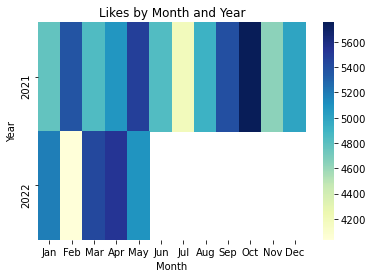

In [35]:
# Create the heatmap
ax = sns.heatmap(df_by_month_year, cmap="YlGnBu", annot=False)

# Set the axis labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Year")
ax.set_title("Likes by Month and Year")

# Display the plot
plt.show()

In [40]:
#Number of likes by category in 2021
df_by_category_and_month = df[df['Year']==2021].pivot_table('Likes', 'Category', 'Month')
df_by_category_and_month

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Category,,,,,,,,,,,,
Culture,5675.25,7812.000000,4883.666667,3705.166667,5445.500000,6651.750000,2510.00,2991.50,4692.20,4688.600000,8294.000000,5031.714286
Family,5232.00,4065.600000,5398.500000,4319.000000,4369.500000,4339.000000,3994.00,7630.00,8610.00,5714.400000,5266.000000,5309.000000
Fashion,2091.00,3477.500000,2549.333333,2609.000000,4515.000000,5527.500000,7055.25,3406.75,8092.00,7003.600000,NaN,4454.500000
Fitness,5762.50,7922.750000,4803.750000,7562.500000,6799.400000,3502.750000,5172.00,6884.00,6764.00,6920.000000,3258.333333,6985.000000
Food,6351.80,7709.500000,5776.200000,5722.000000,4106.500000,3426.000000,2769.00,4110.00,2588.00,4547.000000,1346.500000,6572.250000
Health,5197.00,5460.400000,5666.200000,6267.000000,6308.166667,3779.333333,2972.00,5050.00,5785.75,7676.250000,4024.500000,4676.000000
Music,2995.25,4900.400000,6092.000000,5961.857143,4640.500000,5982.000000,4401.00,7170.50,6104.50,4715.333333,4611.000000,2909.000000
Travel,3945.25,2887.666667,2568.000000,416.500000,7119.000000,4180.333333,3863.00,3055.00,4240.50,5897.500000,5443.500000,3907.500000


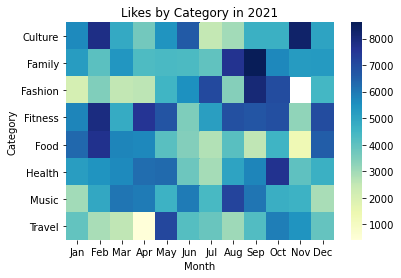

In [41]:
# Create the heatmap
ax = sns.heatmap(df_by_category_and_month, cmap="YlGnBu", annot=False)

# Set the axis labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Category")
ax.set_title("Likes by Category in 2021")

# Display the plot
plt.show()

Revised Conclusions:

Based on the exploratory data analysis performed, the following conclusions can be drawn:

1.  The Tweets dataset spans the period from January 1, 2021, to May 15, 2022, and includes like counts across 8 categories (Culture, Fashion, Fitness, Health, Music, Family, Travel and Food).

2.  The dataset is complete within its date range, with no missing dates or null values.

3.  The data for 2022 is truncated, ending on May 15th. This incomplete year could pose challenges for forecasting or modeling.  Supplementing the dataset with additional data, if available, should be considered to address this limitation.

4.  Approximately 73% of the observations in the dataset are from 2021, reflecting the shorter timeframe covered in 2022.

5.  Music-related tweets represent over 15% of all entries.

6.  "Fitness" is the category with the highest total like count, exceeding 6,000 likes. "Health," "Music," and "Family" each have over 5,500 likes, while all other categories has fewer than 5,000 likes. 

7.  October 2021 was the most active month overall, with a combined like count across all categories exceeding 5,500.

8.  "Family" and "Culture" experienced peak like counts in September and October 2021, respectively, each surpassing 8,000 likes.